In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv('coin_gecko_2022-03-17 (1).csv')

### EDA Report: Data Loading
- Loaded the dataset `coin_gecko_2022-03-17 (1).csv` into a DataFrame named `df`.
- The dataset contains information about various cryptocurrencies, including price, volume, market cap, and date.


In [4]:
df.dtypes

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object

In [5]:
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17


### EDA Report: Data Types and Preview
- Inspected data types to distinguish between numerical and categorical features.
- Displayed the first few rows to get an overview of the data structure and sample values.


In [6]:
df.shape

(500, 9)

### EDA Report: Data Shape
- The dataset shape indicates the number of rows (cryptocurrencies) and columns (features).
- This helps understand the dataset size and dimensionality.


In [7]:
# Top 10 coins by market cap
top_10_market_cap = df.nlargest(10, 'mkt_cap')
plt.figure(figsize=(10, 6))
sns.barplot(x='mkt_cap', y='name', data=top_10_market_cap, palette='viridis')
plt.title('Top 10 Coins by Market Cap')
plt.xlabel('Market Cap')
plt.ylabel('Coin Name')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `name` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

### EDA Report: Top 10 Coins by Market Cap
- Visualized the top 10 cryptocurrencies by market capitalization.
- This highlights the most valuable coins in the market as of the dataset date.


In [ ]:
# Top 10 coins by 24-hour volume
top_10_volume = df.nlargest(10, '24h_volume')
plt.figure(figsize=(10, 6))
sns.barplot(x='24h_volume', y='name', data=top_10_volume, palette='coolwarm')
plt.title('Top 10 Coins by 24-Hour Volume')
plt.xlabel('24-Hour Volume')
plt.ylabel('Coin Name')
plt.tight_layout()
plt.show()

### EDA Report: Top 10 Coins by 24-Hour Volume
- Visualized the top 10 cryptocurrencies by 24-hour trading volume.
- This shows which coins are most actively traded.


In [8]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,5.000000e+02,496.000000,496.000000,495.000000,4.960000e+02,5.000000e+02
mean,6.594269e+02,0.000681,0.018615,0.008038,2.508801e+08,3.787932e+09
std,4.595355e+03,0.033128,0.060142,0.252549,2.285948e+09,3.826905e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,4.349000e+01,6.731896e+07
25%,2.043850e-01,-0.001000,0.000000,-0.051500,1.757171e+06,1.194822e+08
50%,1.100000e+00,0.001000,0.011000,-0.014000,7.890414e+06,2.168525e+08
75%,7.435000e+00,0.004000,0.030000,0.020000,3.638643e+07,6.091268e+08
max,4.090907e+04,0.095000,0.577000,4.608000,4.413140e+10,7.760774e+11


### EDA Report: Statistical Summary
- Used `describe()` to get summary statistics (mean, std, min, max, quartiles) for all numerical features.
- This helps identify the range and distribution of values, as well as potential outliers.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          496 non-null    float64
 4   24h         496 non-null    float64
 5   7d          495 non-null    float64
 6   24h_volume  496 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


### EDA Report: Data Info
- Used `info()` to check for missing values and confirm data types.
- Ensured that all columns are correctly typed and identified any columns needing cleaning or conversion.


In [10]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

### EDA Report: Date Conversion
- Converted the `date` column to datetime format for time-series analysis.
- This enables temporal visualizations and feature engineering based on date.


In [11]:
df['date']

0     2022-03-17
1     2022-03-17
2     2022-03-17
3     2022-03-17
4     2022-03-17
         ...    
495   2022-03-17
496   2022-03-17
497   2022-03-17
498   2022-03-17
499   2022-03-17
Name: date, Length: 500, dtype: datetime64[ns]

In [12]:
df.columns

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')

In [13]:
columns = [column for column in df.columns]

num_features = [feature for feature in columns if df[feature].dtype != 'O']
cat_features = [feature for feature in columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(num_features), num_features))
print('We have {} categorical features: {}'.format(len(cat_features), cat_features))

We have 7 numerical features : ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date']
We have 2 categorical features: ['coin', 'symbol']


### EDA Report: Feature Types
- Split features into numerical and categorical types.
- This is important for selecting appropriate analysis and modeling techniques for each feature type.


In [14]:
columns

['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date']

In [15]:
df.columns

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')

In [16]:
for col in cat_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

coin
Bitcoin           0.2
Kishu Inu         0.2
Iron Bank EURO    0.2
Prometeus         0.2
flexUSD           0.2
                 ... 
APENFT            0.2
Metis Token       0.2
0x                0.2
Ontology          0.2
Verus Coin        0.2
Name: proportion, Length: 500, dtype: float64
---------------------------
symbol
TIME     0.4
FEG      0.4
RUNE     0.4
BTC      0.2
ACA      0.2
        ... 
NFT      0.2
METIS    0.2
ZRX      0.2
ONT      0.2
VRSC     0.2
Name: proportion, Length: 497, dtype: float64
---------------------------


### EDA Report: Categorical Feature Distribution
- Displayed the distribution of values for each categorical feature.
- Helps identify dominant categories and potential data imbalance.


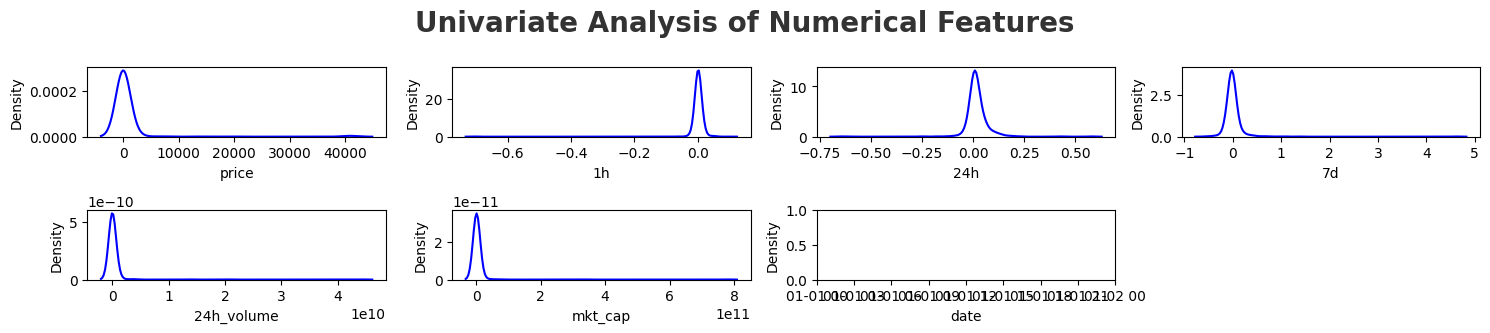

In [17]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_features)):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(x=df[num_features[i]], color='blue')
    plt.xlabel(num_features[i])
    plt.tight_layout()
    

### EDA Report: Univariate Analysis of Numerical Features
- Plotted the distribution of each numerical feature using KDE plots.
- This reveals the shape, skewness, and spread of each feature.


<Axes: >

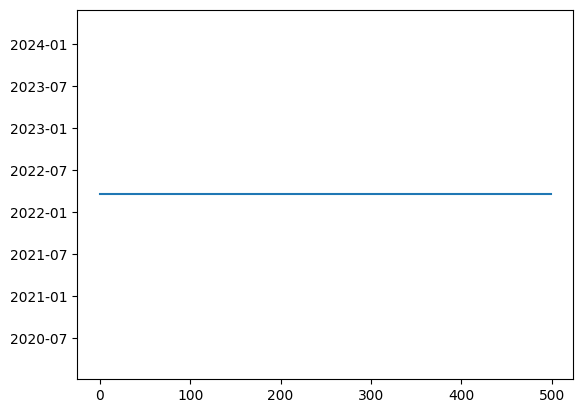

In [18]:
df.date.plot()

### EDA Report: Date Plot
- Plotted the `date` column to visualize the time span and check for missing or duplicate dates.


In [19]:
df=df.drop('date', axis=1)
df.columns

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap'], dtype='object')

### EDA Report: Dropping Date Column
- Dropped the `date` column after extracting necessary time-based features.
- This prevents data leakage in modeling.


In [20]:
top_mktcap=df.sort_values('mkt_cap', ascending=False).head(10)
top_mktcap

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10
5,XRP,XRP,0.796926,0.006,0.016,0.038,3.642947e+09,3.834236e+10
6,Terra,LUNA,87.640000,-0.000,-0.020,-0.118,1.555364e+09,3.225657e+10
7,Solana,SOL,90.620000,0.016,0.058,0.028,1.921989e+09,2.927060e+10
8,Cardano,ADA,0.838396,0.002,0.018,-0.013,7.844362e+08,2.689173e+10
9,Avalanche,AVAX,79.780000,0.002,0.083,0.027,1.386901e+09,2.128204e+10


### EDA Report: Top 10 Market Cap Table
- Displayed and visualized the top 10 coins by market cap for further inspection.


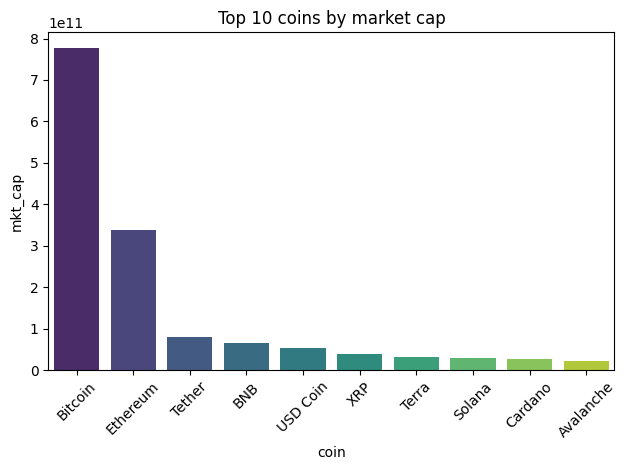

In [21]:
sns.barplot(x='coin', y='mkt_cap', data=top_mktcap, palette='viridis')
plt.title('Top 10 coins by market cap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
top_24h_volume=df.sort_values('24h_volume', ascending=False).head(10)
top_24h_volume

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11
11,Binance USD,BUSD,0.999538,-0.001,-0.002,-0.001,3.713595e+09,1.781248e+10
5,XRP,XRP,0.796926,0.006,0.016,0.038,3.642947e+09,3.834236e+10
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10
7,Solana,SOL,90.620000,0.016,0.058,0.028,1.921989e+09,2.927060e+10
6,Terra,LUNA,87.640000,-0.000,-0.020,-0.118,1.555364e+09,3.225657e+10
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10
9,Avalanche,AVAX,79.780000,0.002,0.083,0.027,1.386901e+09,2.128204e+10


### EDA Report: Top 10 by 24h Volume Table
- Displayed and visualized the top 10 coins by 24-hour trading volume for further inspection.


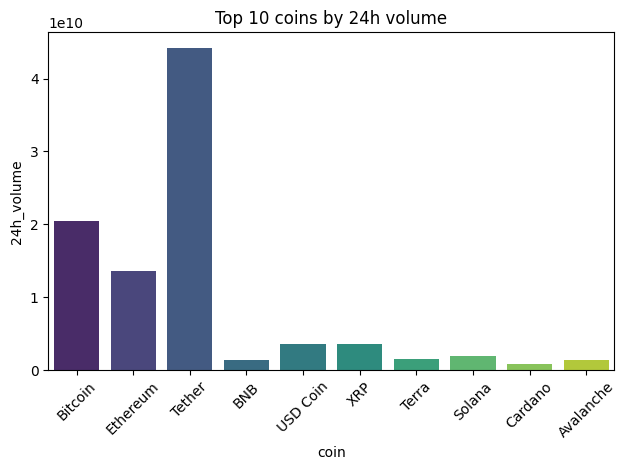

In [23]:
sns.barplot(x='coin', y='24h_volume', data=top_mktcap, palette='viridis')
plt.title('Top 10 coins by 24h volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

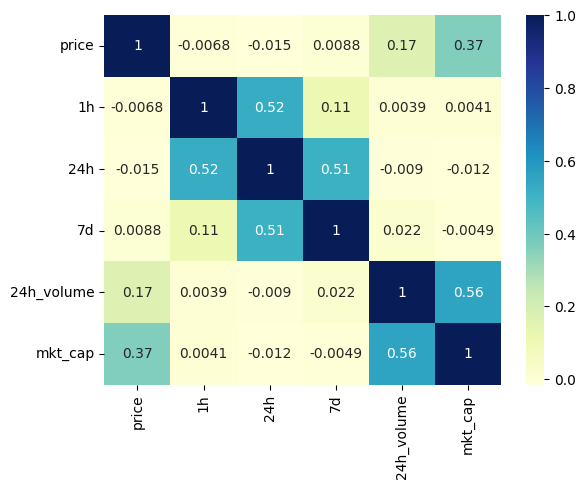

In [24]:
numeric_features=num_features.copy()
numeric_features.remove('date')
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

### EDA Report: Correlation Heatmap
- Plotted a heatmap of correlations between numerical features.
- This helps identify relationships and multicollinearity among features.
